# Duboko Učenje: 1. Laboratorijska vježba

### Upute za vježbu dostupne su [ovdje](http://www.zemris.fer.hr/~ssegvic/du/lab1.shtml)

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import src.utils.data as data
import src.utils.mlutils as mlutils

from importlib import reload

## 0. Uvod u TensorFlow

In [2]:
# oblikovanje računskog grafa
a = tf.constant(5)
b = tf.constant(8)
x = tf.placeholder(dtype='int32')
c = a + b * x
d = b * x

# fazu zadavanja upita započinjemo 
# stvaranjem izvedbenog konteksta:
session = tf.Session()

# zadajemo upit: izračunati c uz x=5
c_val = session.run(c, feed_dict={x: 5})

# ispis rezultata
print(c_val)

45


In [5]:
X = tf.placeholder(tf.float32, [2, 2]) 
Y = 3 * X + 5  
z = Y[0,0]
sess = tf.Session()
Y_val = sess.run(Y, feed_dict={X: [[0,1],[2,3]]})
z_val = sess.run(z, feed_dict={X: np.ones((2,2), dtype=np.float32)})

print(Y_val[0,0], type(Y_val))
print(z_val, type(z_val))

5.0 <class 'numpy.ndarray'>
8.0 <class 'numpy.float32'>


### 0.c Primjena TensorFlowa u strojnom učenju

In [6]:
X = tf.placeholder(tf.float32, [None, 5]) 
Y = 3 * X + 5  

sess = tf.Session()
Y_val = sess.run(Y, feed_dict={X: np.ones((3,5))})

Y_val

array([[8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.]], dtype=float32)

In [7]:
print(Y.get_shape())

(?, 5)


In [8]:
print(sess.run(tf.shape(Y), feed_dict={X: np.ones((3,5))}))

[3 5]


## 1. Generiranje linearno nerazdvojivih podataka

In [4]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

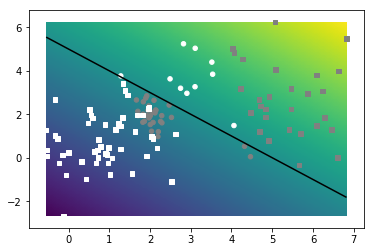

In [5]:
np.random.seed(100)

X,Y_ = data.sample_gmm_2d(4, 2, 30)
Y = myDummyDecision(X)>0

bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(myDummyDecision, bbox, offset=0)
data.graph_data(X, Y_, Y)
plt.show()

## 2. Višeslojna klasifikacija u Pythonu

In [5]:
import src.fcann2 as fcann2

In [6]:
def fcann_dec_function(X, W1, b1, W2, b2):
    def classify(X):
        return fcann2.predict(fcann2.classify(X, W1, b1, W2, b2))
    
    return classify

In [7]:
np.random.seed(100)

X, Y_ = data.sample_gmm_2d(6, 2, 10)

W1, b1, W2, b2 = fcann2.train(X, Y_, trace=True)

iteration 0: loss 338.51063640047664
iteration 10000: loss 22.619810950669667
iteration 20000: loss 22.40310499163465
iteration 30000: loss 22.18008673191161
iteration 40000: loss 21.99343613330466
iteration 50000: loss 21.87268742359417
iteration 60000: loss 21.836101451534372
iteration 70000: loss 21.7179752486769
iteration 80000: loss 21.724799676555076
iteration 90000: loss 21.655958741485083


accuracy: 0.88333, 

precision-recall matrix: 
[(0.9333333333333333, 0.8484848484848485), (0.8333333333333334, 0.9259259259259259)], 

confusion matrix: 
[[28  2]
 [ 5 25]]


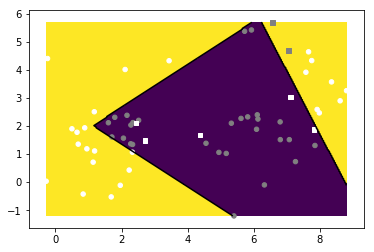

In [8]:
probs = fcann2.classify(X, W1, b1, W2, b2)

Y = fcann2.predict(probs)

# evaluate and print performance measures
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_)
print("accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

# graph the decision surface
decfun = fcann_dec_function(X, W1, b1, W2, b2)
bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(decfun, bbox, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show() 

## 3. Linearna regresija u TensorFlowu

### 3.1 Osnovni slučaj

In [9]:
## 1. definicija računskog grafa
# podatci i parametri

X = tf.placeholder(tf.float32
                  , [None])
Y_ = tf.placeholder(tf.float32, [None])
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# afini regresijski model
Y = a * X + b

# kvadratni gubitak
loss = (Y - Y_)**2

# optimizacijski postupak: gradijentni spust
trainer = tf.train.GradientDescentOptimizer(0.1)
train_op = trainer.minimize(loss)

## 2. inicijalizacija parametara
sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(100):
    val_loss, _, val_a, val_b = sess.run([loss, train_op, a, b], feed_dict={X: [1, 2], Y_: [3, 5]})
    
    #print("Iteration: %d, loss = %s, a = %s, b = %s" % (i, str(val_loss), str(val_a), str(val_b)))
    
print("a = %s, b = %s" % (str(val_a), str(val_b)))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
a = 1.9945369, b = 1.0088396


### 3.2 Naprednija funkcionalnost

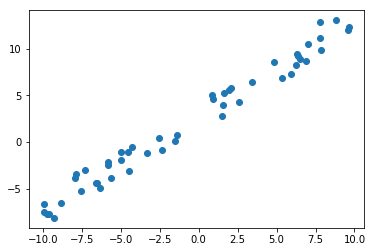

In [10]:
import src.tf_impl.tf_linreg as linreg
reload(linreg)

np.random.seed(100)

X, Y = linreg.make_dataset(50)

plt.plot(X, Y, 'o')
plt.show()

In [40]:
a, b = linreg.train(X, Y, trace=True)

a = 0.37860343, b = 0.02057096, loss = 22.512793
tf-gradients: [[-37.860344]
 [ -2.057096]]
calculated gradients: [[37.860344]] 2.057096 

a = 0.99445343, b = 1.7447987, loss = 1.0136268
tf-gradients: [[-0.01865987]
 [-1.0193944 ]]
calculated gradients: [[0.01865992]] 1.0193945 

a = 1.0062281, b = 2.388117, loss = 0.5595094
tf-gradients: [[-0.0069202]
 [-0.3779974]]
calculated gradients: [[0.00692019]] 0.3779974 

a = 1.0105941, b = 2.6266637, loss = 0.49706963
tf-gradients: [[-0.00256571]
 [-0.14016342]]
calculated gradients: [[0.00256577]] 0.1401634 

a = 1.0122132, b = 2.7151186, loss = 0.48848417
tf-gradients: [[-0.00094901]
 [-0.05197279]]
calculated gradients: [[0.00094892]] 0.051972803 

a = 1.0128134, b = 2.7479174, loss = 0.48730388
tf-gradients: [[-0.0003553 ]
 [-0.01927178]]
calculated gradients: [[0.00035524]] 0.019271765 

a = 1.013036, b = 2.7600799, loss = 0.48714152
tf-gradients: [[-0.00013298]
 [-0.00714584]]
calculated gradients: [[0.00013297]] 0.0071458383 

a = 1.0

AttributeError: 'Tensor' object has no attribute 'ndim'

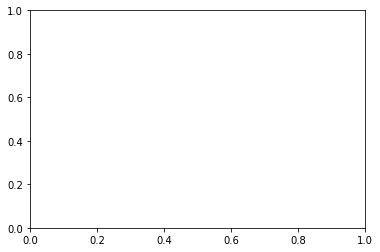

In [11]:
plt.plot(X, linreg.predict(X, a, b))
plt.plot(X, Y, 'o')
plt.show()

## 4. Logistička regresija u TensorFlowu

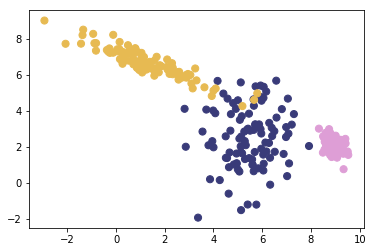

In [12]:
import src.tf_impl.tf_logreg as logreg
reload(logreg)
reload(data)

np.random.seed(100)
tf.reset_default_graph()
tf.set_random_seed(100)

n_classes = 3
n_samples = 100

X, Y_, Yoh_ = data.sample_gauss_2d(n_classes, n_samples, one_hot=True)

mlutils.plot_2d_clf_problem(X, Y_)

In [13]:
model = logreg.TFLogreg(X.shape[1], Yoh_.shape[1], 0.1, 0.25)
model.train(X, Yoh_)

accuracy: 0.96333, 

precision-recall matrix: 
[(0.92, 0.968421052631579), (0.97, 0.9797979797979798), (1.0, 0.9433962264150944)], 

confusion matrix: 
[[ 92   2   6]
 [  3  97   0]
 [  0   0 100]]


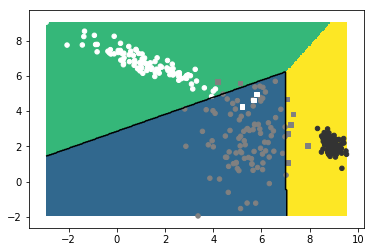

In [14]:
probs = model.predict_proba(X)
Y = np.argmax(probs, axis=1)

# evaluate and print performance measures
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_)
print("accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

# graph the decision surface
bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(lambda x: model.predict(x), bbox, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show() 

## 5. Konfigurabilni duboki modeli u Tensorflowu

### 5.1 Osnovna plitka konfiguracija

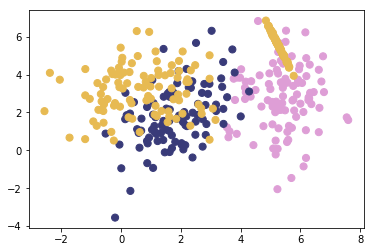

In [19]:
import src.tf_impl.tf_deep as deep
reload(deep)

np.random.seed(100)
tf.reset_default_graph()
tf.set_random_seed(100)

n_classes = 3
n_samples = 100

X, Y_, Yoh_ = data.sample_gmm_2d(4, n_classes, n_samples, one_hot=True)

mlutils.plot_2d_clf_problem(X, Y_)

In [24]:
model = deep.TFDeep([2, 5, 3], alpha=0.01)
model.train(X, Yoh_)

accuracy: 0.78500, 

precision-recall matrix: 
[(0.67, 0.7204301075268817), (0.83, 0.772093023255814), (0.81, 0.8804347826086957)], 

confusion matrix: 
[[ 67  30   3]
 [ 26 166   8]
 [  0  19  81]]


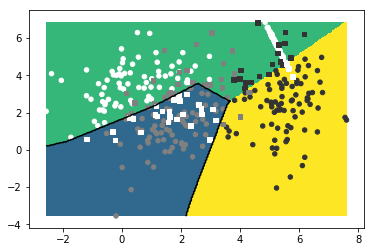

In [25]:
probs = model.predict_proba(X)
Y = np.argmax(probs, axis=1)

# evaluate and print performance measures
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_)
print("accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

# graph the decision surface
bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(lambda x: model.predict(x), bbox, offset=0.5)
data.graph_data(X, Y_, Y)

plt.show() 

### 5.2 Brojanje parametara

In [13]:
def count_params():
    count = 0
    
    for variable in tf.trainable_variables():
        params = int(np.prod(variable.get_shape()))
        print("%s, shape: %s, parameters: %d" % (variable.name, variable.get_shape(), params))
        
        count += params
        
    print("Total number of parameters: %d" % count)
    
count_params()

W0:0, shape: (3, 2), parameters: 6
b0:0, shape: (3,), parameters: 3
Total number of parameters: 9


### 5.3. ReLU aktivacija

DATASET 1:

configuration: [2, 2]
accuracy: 0.675, recall: 0.649, precision: 0.762



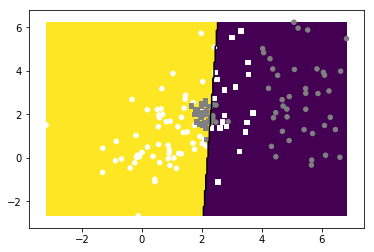

configuration: [2, 10, 2]
accuracy: 0.887, recall: 0.956, precision: 0.812



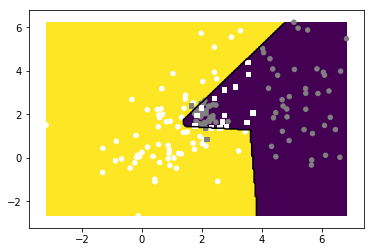

configuration: [2, 10, 10, 2]
accuracy: 0.869, recall: 0.883, precision: 0.850



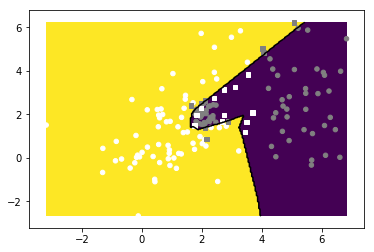

DATASET 2:

configuration: [2, 2]
accuracy: 0.883, recall: 0.810, precision: 0.850



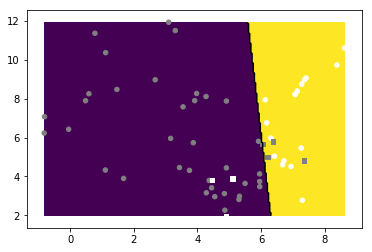

configuration: [2, 10, 2]
accuracy: 0.867, recall: 0.773, precision: 0.850



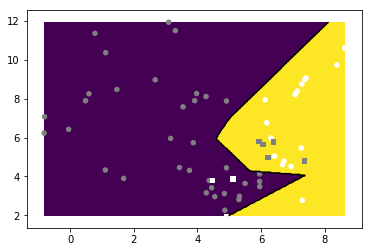

configuration: [2, 10, 10, 2]
accuracy: 0.667, recall: 0.000, precision: 0.000



/home/lumba/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


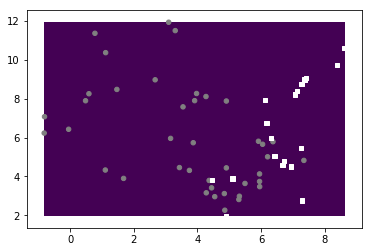

In [9]:
import src.utils.data as data
reload(deep)
reload(data)

def test_deep_model(activation=tf.nn.relu):
    np.random.seed(100)
    tf.reset_default_graph()
    tf.set_random_seed(100)

    dataset = (data.sample_gmm_2d(4, 2, 40, one_hot=True), data.sample_gmm_2d(6, 2, 10, one_hot=True))
    configs = ([2,2], [2, 10, 2], [2, 10, 10,2])

    for i, (X, Y_, Yoh_) in enumerate(dataset):
        print("DATASET %d:\n" % (i + 1))

        for config in configs:
            model = deep.TFDeep(config, 0.05, 1e-6, activation=activation)
            model.train(X, Yoh_, 4000)
            Y = model.predict(X)

            accuracy, recall, precision = data.eval_perf_binary(Y, Y_)

            print("configuration:", config)
            print("accuracy: %.3f, recall: %.3f, precision: %.3f\n" % (accuracy, recall, precision))

            bbox=(np.min(X, axis=0), np.max(X, axis=0))

            data.graph_surface(lambda x: model.predict(x), bbox, offset=0.5)
            data.graph_data(X, Y_, Y)

            plt.show() 
            
test_deep_model()

### 5.4 Sigmoidalna aktivacija

DATASET 1:

configuration: [2, 2]
accuracy: 0.675, recall: 0.649, precision: 0.762



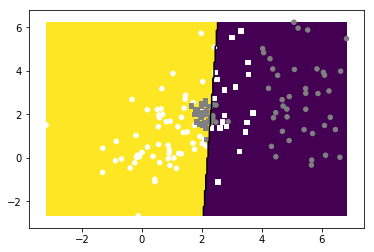

configuration: [2, 10, 2]
accuracy: 0.887, recall: 0.970, precision: 0.800



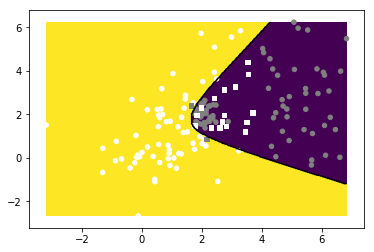

configuration: [2, 10, 10, 2]
accuracy: 0.887, recall: 0.970, precision: 0.800



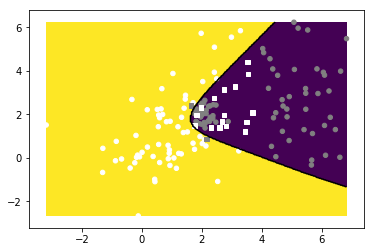

DATASET 2:

configuration: [2, 2]
accuracy: 0.883, recall: 0.810, precision: 0.850



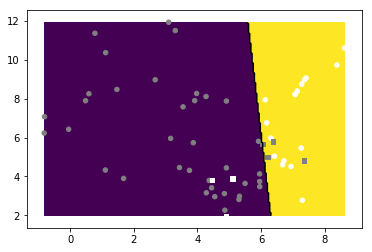

configuration: [2, 10, 2]
accuracy: 0.850, recall: 0.789, precision: 0.750



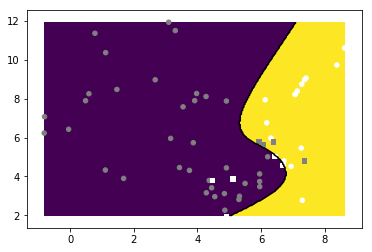

configuration: [2, 10, 10, 2]
accuracy: 0.850, recall: 0.762, precision: 0.800



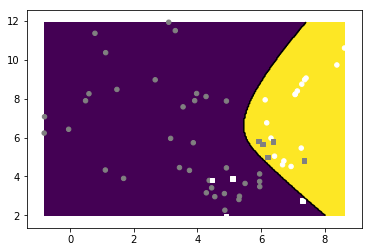

In [54]:
test_deep_model(tf.nn.sigmoid)

## 6. Usporedba s jezgrenim SVM-om

### 6.1 Osnovna funkcionalnost

accuracy: 0.933, recall: 1.000, precision: 0.867, AP: 0.980694746072944



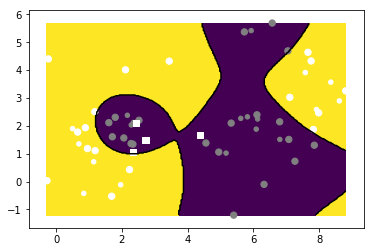

In [26]:
import src.svm_wrapper as svm
reload(svm)
reload(data)

np.random.seed(100)

X, Y_ = data.sample_gmm_2d(6, 2, 10)
model = svm.KSVM(X, Y_)
Y = model.predict(X)

accuracy, recall, precision = data.eval_perf_binary(model.predict(X), Y_)
AP = data.eval_AP(Y_[model.get_scores(X)[:, 1].argsort()])
print("accuracy: %.3f, recall: %.3f, precision: %.3f, AP: %s\n" % (accuracy, recall, precision, AP))

bbox=(np.min(X, axis=0), np.max(X, axis=0))

data.graph_surface(lambda x: model.predict(x), bbox, offset=0.5)
data.graph_data(X, Y_, Y, special=model.support)

plt.show() 

### 6.2. Usporedba SVM-a s konfigurabilnim dubokim modelom

In [27]:
np.random.seed(100)

for K in range(2, 10):
    X, Y_, Yoh_ = data.sample_gmm_2d(K, 2, 20, one_hot=True)
    
    svm_model = svm.KSVM(X, Y_)
    deep_model = deep.TFDeep([2, 10, 10, 2], activation=tf.nn.sigmoid)
    
    deep_model.train(X, Yoh_)
    
    accuracy_svm, recall_svm, precision_svm = data.eval_perf_binary(svm_model.predict(X), Y_)
    AP_svm = data.eval_AP(Y_[svm_model.get_scores(X)[:, 1].argsort()])
    
    accuracy_deep, recall_deep, precision_deep = data.eval_perf_binary(deep_model.predict(X), Y_)
    AP_deep = data.eval_AP(Y_[deep_model.predict_proba(X)[:, 1].argsort()])
    
    print("K:", K)
    print("Deep model:")
    print("accuracy: %.3f, recall: %.3f, precision: %.3f, AP: %s" % 
          (accuracy_deep, recall_deep, precision_deep, AP_deep))
    print("SVM:")
    print("accuracy: %.3f, recall: %.3f, precision: %.3f, AP: %s\n" % 
          (accuracy_svm, recall_svm, precision_svm, AP_svm))

K: 2
Deep model:
accuracy: 0.975, recall: 1.000, precision: 0.950, AP: 1.0
SVM:
accuracy: 0.975, recall: 0.952, precision: 1.000, AP: 1.0

K: 3
Deep model:
accuracy: 0.667, recall: 0.667, precision: 1.000, AP: 0.9234004879766144
SVM:
accuracy: 0.900, recall: 0.972, precision: 0.875, AP: 0.9871390331427238

K: 4
Deep model:
accuracy: 0.725, recall: 0.737, precision: 0.700, AP: 0.8739335603194851
SVM:
accuracy: 0.812, recall: 0.805, precision: 0.825, AP: 0.9297004471179541

K: 5
Deep model:
accuracy: 0.930, recall: 0.965, precision: 0.917, AP: 0.9866720938732365
SVM:
accuracy: 0.950, recall: 0.982, precision: 0.933, AP: 0.9793090641227756

K: 6
Deep model:
accuracy: 0.833, recall: 0.823, precision: 0.850, AP: 0.8790695792817373
SVM:
accuracy: 0.875, recall: 0.846, precision: 0.917, AP: 0.9199651367644477

K: 7
Deep model:
accuracy: 0.907, recall: 0.972, precision: 0.863, AP: 0.9802781494930176
SVM:
accuracy: 0.964, recall: 0.987, precision: 0.950, AP: 0.9931486206630247

K: 8
Deep model:

## 7. Case study: MNIST

In [28]:
from tensorflow.examples.tutorials.mnist import input_data

tf.app.flags.DEFINE_string('f', '', 'kernel')
tf.app.flags.DEFINE_string('data_dir', 'res/data/', 'Directory for storing data')
mnist = input_data.read_data_sets(tf.app.flags.FLAGS.data_dir, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting res/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting res/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting res/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting res/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tenso

55000 784 10
(784,)


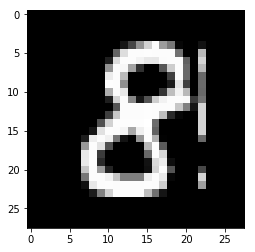

In [29]:
N=mnist.train.images.shape[0]
D=mnist.train.images.shape[1]
C=mnist.train.labels.shape[1]
print(N, D, C)
print(mnist.train.images[0].shape)
plt.imshow(mnist.train.images[9].reshape(28,28), cmap='gray')

### 7.1 Osnovni model

In [30]:
import src.tf_impl.tf_deep as deep
from sklearn.model_selection import train_test_split

X_train = mnist.train.images
Yoh_train_ = mnist.train.labels
Y_train_ = np.argmax(Yoh_train_, axis=1)

X_test = mnist.test.images
Yoh_test_ = mnist.test.labels
Y_test_ = np.argmax(Yoh_test_, axis=1)

for alpha in [1e-4, 1e-3, 1e-2]:
    model = deep.TFDeep([D, C], alpha=alpha)
    model.train(X_train, Yoh_train_)
    Y = model.predict(X_test)
    
    print("alpha:", alpha)
    accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(model.predict(X_train), Y_train_)
    accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
    print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
    print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
         %(accuracy, str(prec_rec), str(matrix)))


alpha: 0.0001

train accuracy: 0.79984, 

precision-recall matrix: [(0.8987876561351947, 0.8896363636363637), (0.9271726816636996, 0.9121159051106512), (0.7815356489945156, 0.7913735653461681), (0.7717275629655906, 0.7733736224671169), (0.7961183342754852, 0.8066055746468117), (0.6731501904952878, 0.7085268045588856), (0.8602547535536275, 0.8528550512445096), (0.8174978127734033, 0.8305777777777777), (0.7172017071812953, 0.6937713157422366), (0.7268060139347268, 0.7135913591359135)]


test accuracy: 0.81230, 

precision-recall matrix: 
[(0.9244897959183673, 0.893491124260355), (0.9286343612334802, 0.9302736098852604), (0.7906976744186046, 0.8087215064420218), (0.7980198019801981, 0.7817652764306499), (0.8054989816700611, 0.8063200815494393), (0.695067264573991, 0.7425149700598802), (0.8444676409185804, 0.8764897074756229), (0.8171206225680934, 0.8100289296046287), (0.7546201232032854, 0.7020057306590258), (0.7393458870168483, 0.7535353535353535)], 

confusion matrix: 
[[ 906    0    4 

### 7.2 Različiti duboki modeli

In [8]:
for alpha in [1e-4, 1e-3, 1e-2]:
    model = deep.TFDeep([D, 100, C], alpha=alpha)
    model.train(X_train, Yoh_train_)
    Y = model.predict(X_test)
    
    print("alpha:", alpha)
    accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(model.predict(X_train), Y_train_)
    accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
    print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
    print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
         %(accuracy, str(prec_rec), str(matrix)))

alpha: 0.0001

train accuracy: 0.89349, 

precision-recall matrix: [(0.9489346069066863, 0.9293038316243929), (0.9566272859686034, 0.9660075175682301), (0.8654478976234004, 0.8774791473586654), (0.8597020219936148, 0.8779206665459156), (0.8986244582626719, 0.8927368026956196), (0.8451975135351915, 0.8394742083250348), (0.9307734908621008, 0.9175614194722475), (0.9067366579177603, 0.9105605341767703), (0.8513638894043422, 0.8449355432780847), (0.8595526219288595, 0.8638290031324857)]


test accuracy: 0.89030, 

precision-recall matrix: 
[(0.9571428571428572, 0.9223205506391348), (0.9629955947136564, 0.9629955947136564), (0.8594961240310077, 0.872173058013766), (0.8693069306930693, 0.8701684836471755), (0.8818737270875764, 0.8863868986693961), (0.8183856502242153, 0.8458864426419467), (0.9206680584551148, 0.9197080291970803), (0.9105058365758755, 0.9122807017543859), (0.837782340862423, 0.8225806451612904), (0.869177403369673, 0.872636815920398)], 

confusion matrix: 
[[ 938    0   12   

### 7.4 Early Stopping

In [11]:
reload(deep)
model = deep.TFDeep([D, 100, C])
model.train_mb(X_train, Yoh_train_, epochs=50, trace=True, ratio=0.2)
Y = model.predict(X_test)

accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(model.predict(X_train), Y_train_)
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

Epoch: 0, avg_train_loss = 13.87209, validation_loss = 9.82396
Epoch: 1, avg_train_loss = 9.69329, validation_loss = 9.35773
Epoch: 2, avg_train_loss = 9.30381, validation_loss = 9.10368
Epoch: 3, avg_train_loss = 9.08328, validation_loss = 8.95933
Epoch: 4, avg_train_loss = 8.90010, validation_loss = 8.73231
Epoch: 5, avg_train_loss = 7.06706, validation_loss = 6.76886
Epoch: 6, avg_train_loss = 6.61310, validation_loss = 6.57763
Epoch: 7, avg_train_loss = 6.40607, validation_loss = 6.41565
Epoch: 8, avg_train_loss = 6.23972, validation_loss = 6.26216
Epoch: 9, avg_train_loss = 6.09886, validation_loss = 6.13041
Epoch: 10, avg_train_loss = 5.97026, validation_loss = 5.99833
Epoch: 11, avg_train_loss = 4.89202, validation_loss = 3.96727
Epoch: 12, avg_train_loss = 3.69139, validation_loss = 3.73932
Epoch: 13, avg_train_loss = 3.51040, validation_loss = 3.60148
Epoch: 14, avg_train_loss = 3.39379, validation_loss = 3.49563
Epoch: 15, avg_train_loss = 3.28561, validation_loss = 3.39089
E

### 7.5 Stohastički i mini-batch gradijentni spust

In [14]:
reload(deep)

model = deep.TFDeep([D, 100, C])
model.train_mb(X_train, Yoh_train_, epochs=50)
Y = model.predict(X_test)

print("alpha:", alpha)
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(model.predict(X_train), Y_train_)
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

alpha: 0.01

train accuracy: 0.98789, 

precision-recall matrix: [(0.9932035268185158, 0.9935685409775817), (0.994821168473863, 0.9956268221574344), (0.9928702010968922, 0.9820976491862567), (0.985455835402625, 0.9823196605374823), (0.9851140003768607, 0.9922186373125831), (0.9875676759574895, 0.9846061575369852), (0.9946464832933358, 0.9929966826391449), (0.9858267716535433, 0.9912033779028853), (0.9749489701243274, 0.9896402335656432), (0.9834983498349835, 0.9738562091503268)]


test accuracy: 0.95990, 

precision-recall matrix: 
[(0.9744897959183674, 0.9656218402426694), (0.9903083700440528, 0.9833770778652668), (0.9622093023255814, 0.9538904899135446), (0.9633663366336633, 0.9511241446725318), (0.9511201629327902, 0.9569672131147541), (0.9551569506726457, 0.9383259911894273), (0.9676409185803758, 0.9716981132075472), (0.9542801556420234, 0.9589442815249267), (0.9260780287474333, 0.9657387580299786), (0.9494549058473737, 0.9494549058473737)], 

confusion matrix: 
[[ 955    0    3   

### 7.6 ADAM optimizacija s fiksnim korakom učenja

In [ ]:
adam_model = deep.TFDeep([784, 100, 10],  delta=1e-4, optimizer=tf.train.AdamOptimizer, alpha=0)

adam_model.train(X_train, Yoh_train_)
Y = adam_model.predict(X_test)

print("alpha:", alpha)
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(adam_model.predict(X_train), Y_train_)
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

### 7.7 ADAM optimizacija s varijabilnim korakom učenja

In [19]:
# TODO
adam_model = deep.TFDeep([784, 100, 10],  delta=1e-4, optimizer=tf.train.AdamOptimizer)

global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(0.1, global_step, 100, 0.98, staircase=True)
adam_model.train_step = tf.train.AdamOptimizer(learning_rate).minimize(adam_model.loss, global_step=global_step)

adam_model.train(X_train, Yoh_train_)
Y = adam_model.predict(X_test)

print("alpha:", alpha)
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(adam_model.predict(X_train), Y_train_)
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

alpha: 0.01

train accuracy: 0.63327, 

precision-recall matrix: [(0.7615723732549596, 0.7393009985734664), (0.8978799158439877, 0.8490970309152127), (0.696892138939671, 0.6712449374889945), (0.5450514366796736, 0.5792648444863336), (0.0003768607499528924, 0.02040816326530612), (0.577300982554642, 0.5656188605108055), (0.8336717740446742, 0.7232543241511852), (0.7389326334208224, 0.6294529736175287), (0.5730191130079793, 0.5727002967359051), (0.6496149614961496, 0.4247692123246613)]


test accuracy: 0.63990, 

precision-recall matrix: 
[(0.7887755102040817, 0.7585868498527969), (0.8986784140969163, 0.868824531516184), (0.6918604651162791, 0.6716839134524929), (0.5643564356435643, 0.5682951146560319), (0.0, 0.0), (0.5997757847533632, 0.5619747899159664), (0.8298538622129437, 0.7155715571557155), (0.7431906614785992, 0.6773049645390071), (0.5492813141683778, 0.5532574974146846), (0.686818632309217, 0.44337811900191937)], 

confusion matrix: 
[[ 773    0   25   47    0   22   16   34   52

### 7.8 Gubitak nenaučenog modela

In [20]:
model = deep.TFDeep([D, 100, C])
Y = model.predict(X_test)

print("alpha:", alpha)
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(adam_model.predict(X_train), Y_train_)
accuracy, prec_rec, matrix = data.eval_perf_multi(Y, Y_test_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

FailedPreconditionError: Attempting to use uninitialized value b0_18
	 [[Node: b0_18/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](b0_18)]]

Caused by op 'b0_18/read', defined at:
  File "/home/lumba/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/lumba/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/lumba/anaconda3/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/home/lumba/anaconda3/lib/python3.5/asyncio/base_events.py", line 1425, in _run_once
    handle._run()
  File "/home/lumba/anaconda3/lib/python3.5/asyncio/events.py", line 127, in _run
    self._callback(*self._args)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-fbf1852916d1>", line 1, in <module>
    model = deep.TFDeep([D, 100, C])
  File "/home/lumba/Programming/Python/deep-learning/dl-lab1/src/tf_impl/tf_deep.py", line 46, in __init__
    b = tf.Variable(tf.random_normal([nex_layer]), name='b%d' % i)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 422, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 80, in identity
    return gen_array_ops.identity(input, name=name)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3264, in identity
    "Identity", input=input, name=name)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/lumba/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value b0_18
	 [[Node: b0_18/read = Identity[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](b0_18)]]


### 7.9 Linearni i jezgreni SVM

In [13]:
import src.svm_wrapper as svm

linear_svm = svm.KSVM(X_train, Y_train_, kernel='linear')
kernel_svm = svm.KSVM(X_train, Y_train_, kernel='rbf')

print("LINEAR SVM:")
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(linear_svm.predict(X_train), Y_train_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))

print("KKERNEL SVM:")
accuracy_train, prec_rec_train, matrix_train = data.eval_perf_multi(kernel_svm.predict(X_train), Y_train_)
print("\ntrain accuracy: %.5f, \n\nprecision-recall matrix: %s\n" % (accuracy_train, prec_rec_train))


LINEAR SVM:


/home/lumba/Programming/Python/deep-learning/dl-lab1/src/utils/data.py:118: RuntimeWarning: invalid value encountered in long_scalars
  recall_i = tp_i / (tp_i + fn_i)
/home/lumba/Programming/Python/deep-learning/dl-lab1/src/utils/data.py:119: RuntimeWarning: invalid value encountered in long_scalars
  precision_i = tp_i / (tp_i + fp_i)



train accuracy: 0.97145, 

precision-recall matrix: [(0.9965099191770757, 0.9887005649717514), (0.9956303608998219, 0.98432), (0.9731261425959781, 0.9636133236784938), (0.9581411848173111, 0.9562754469817667), (0.9766346335029207, 0.9662565249813572), (0.9482654902747143, 0.9625483411357623), (0.990400590732878, 0.9878475418891548), (0.9718285214348207, 0.9745569398140025), (0.9513824457227686, 0.9660825325042397), (0.9479281261459479, 0.9616815476190477)]


test accuracy: 0.00000, 

precision-recall matrix: 
[(nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (0.0, nan), (nan, nan), (0.

/home/lumba/Programming/Python/deep-learning/dl-lab1/src/utils/data.py:118: RuntimeWarning: invalid value encountered in long_scalars
  recall_i = tp_i / (tp_i + fn_i)
/home/lumba/Programming/Python/deep-learning/dl-lab1/src/utils/data.py:119: RuntimeWarning: invalid value encountered in long_scalars
  precision_i = tp_i / (tp_i + fp_i)



train accuracy: 0.94184, 

precision-recall matrix: [(0.9797942689199118, 0.9717617052286391), (0.9807412202621784, 0.9540302267002518), (0.9325411334552103, 0.9347626901227781), (0.9146860588861299, 0.9335626357711803), (0.9525155455059355, 0.9234563390573621), (0.9209945859234009, 0.9151225343693963), (0.9693557319549566, 0.9590867579908676), (0.9415573053368329, 0.953064116188452), (0.9092596028947857, 0.9404990403071017), (0.9110744407774111, 0.9280911468061263)]


test accuracy: 0.00000, 

precision-recall matrix: 
[(nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, 0.0), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (nan, nan), (0.0, nan), (nan

In [15]:
X_test = mnist.test.images
Yoh_test_ = mnist.test.labels
Y_test_ = np.argmax(Yoh_test_, axis=1)

print("LINEAR SVM:")
accuracy, prec_rec, matrix = data.eval_perf_multi(linear_svm.predict(X_test), Y_test_)
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

print("\nKERNEL SVM:")
accuracy, prec_rec, matrix = data.eval_perf_multi(kernel_svm.predict(X_test), Y_test_)
print("\ntest accuracy: %.5f, \n\nprecision-recall matrix: \n%s, \n\nconfusion matrix: \n%s"
     %(accuracy, str(prec_rec), str(matrix)))

LINEAR SVM:

test accuracy: 0.93930, 

precision-recall matrix: 
[(0.976530612244898, 0.9512922465208747), (0.9876651982378855, 0.9714038128249567), (0.937984496124031, 0.9272030651340997), (0.9336633663366337, 0.9049904030710173), (0.960285132382892, 0.930898321816387), (0.905829596412556, 0.9160997732426304), (0.9478079331941545, 0.9547844374342797), (0.9299610894941635, 0.952191235059761), (0.8993839835728953, 0.9299363057324841), (0.9048562933597621, 0.9490644490644491)], 

confusion matrix: 
[[ 957    0    4    1    1    7    8    1    1    0]
 [   0 1121    4    2    0    1    1    1    5    0]
 [   9    5  968   10    2    3   11    7   16    1]
 [   2    4   16  943    1   17    1    8   15    3]
 [   1    1    8    1  943    1    5    3    3   16]
 [   9    2    3   39    5  808   10    1   12    3]
 [  12    2   11    1    5   17  908    0    2    0]
 [   2    6   20   11   10    0    0  956    3   20]
 [   8    7    6   25    7   25    7    7  876    6]
 [   6    6    4    9